In [1]:
  #import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import math

In [3]:
#mount the google drive into colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


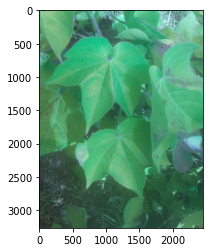

In [12]:
#open sample image
#image = cv2.imread('/content/drive/MyDrive/Cotton images obj-classify/20220529_083745.jpg')
image = cv2.imread('/content/drive/MyDrive/Cotton images obj-classify/20220529_085911.jpg')
plt.imshow(image)
plt.show()

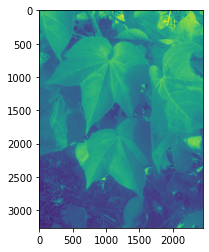

In [13]:
rcb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
y = (0.3*rcb[:,:,0]) +(0.6*rcb[:,:,1]) + (0.1*rcb[:,:,2])

plt.imshow(y)
plt.show()

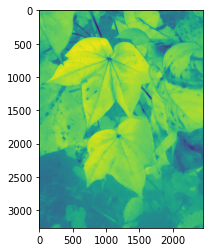

(3264, 2448)


In [14]:
Cg=rcb[:,:,1]-y
plt.imshow(Cg)
plt.show()

print(Cg.shape)

(-0.5, 2447.5, 3263.5, -0.5)

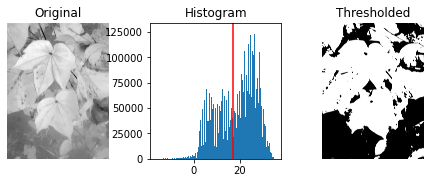

In [15]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(Cg)
binary = Cg > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')

ax[0].imshow(Cg, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(Cg.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')


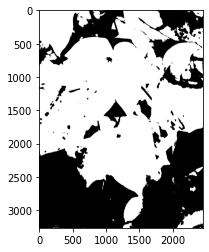

(3264, 2448)


In [16]:
plt.imshow(binary,cmap='gray')
plt.show()

print(binary.shape)

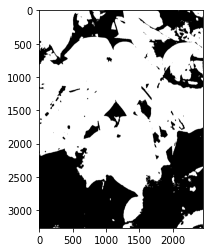

In [17]:
binary = binary.astype('uint8')
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(binary,kernel,iterations =1)
plt.imshow(dilation,'gray')
plt.show()

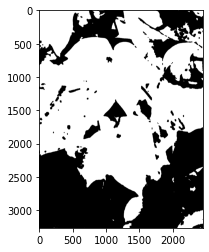

In [18]:
kernel = np.ones((9,9),np.uint8)
img_erosion = cv2.erode(dilation, kernel, iterations=1)
plt.imshow(img_erosion,'gray')
plt.show()

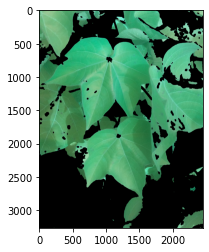

In [19]:
mask = img_erosion.astype('uint8')
result = cv2.bitwise_and(image,image,mask=mask)

plt.imshow(result)
plt.show()

**Segmentation**

(3264, 2448, 3)


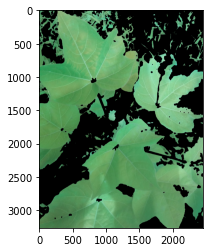

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Cotton images obj-classify/20220529_085557.jpg")
rcb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
y = (0.3*rcb[:,:,0]) +(0.6*rcb[:,:,1]) + (0.1*rcb[:,:,2])
Cg=rcb[:,:,1]-y
thresh = threshold_otsu(Cg)
binary = Cg > thresh
binary = binary.astype('uint8')
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(binary,kernel,iterations =1)
kernel = np.ones((9,9),np.uint8)
img_erosion = cv2.erode(dilation, kernel, iterations=1)
result = cv2.bitwise_and(image,image,mask=img_erosion)

plt.imshow(result)
print(result.shape)

**Segmentation for all images**

In [ ]:
#data set path in my google drive
dir_path = '/content/drive/MyDrive/Cotton images obj-classify'
#categories = ['Carpetweeds','Eclipta','Morning_glory','Ragweed']
#for j in categories:
#path = dir_path+'/'+j
i=0
for img in os.listdir(dir_path):
  image =  cv2.imread(os.path.join(dir_path,img))
  rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  y = (0.3*rgb[:,:,0]) +(0.6*rgb[:,:,1]) + (0.1*rgb[:,:,2])
  Cg=rgb[:,:,1]-y
  thresh = threshold_otsu(Cg)
  binary = Cg > thresh
  binary = binary.astype('uint8')
  kernel = np.ones((5,5),np.uint8)
  dilation = cv2.dilate(binary,kernel,iterations =1)
  kernel = np.ones((9,9),np.uint8)
  img_erosion = cv2.erode(dilation, kernel, iterations=1)
  result = cv2.bitwise_and(image,image,mask=img_erosion)
  #file write
  file_path = '/content/drive/MyDrive/ME project segmented dataset/Cotton/new_'+img
  cv2.imwrite(file_path,result)
  i += 1
print("   Segmenting cotton images : ", i)

   Segmenting cotton images :  166
